In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
fclim = '../../data/cmems_climatology_mon.nc'
path1 = '../output/dync.nc'
# new vertical grid
ds = xr.open_dataset(fclim)
dep = ds['depth'].values
dr = np.zeros(dep.shape)
lev = 0
for i in range(dep.size):
    dr[i] = 2*(dep[i]-lev)
    lev += dr[i]
Rid = [0,14,19,22,24]+[id for id in range(25,dep.size)]
dR = np.zeros(len(Rid)-1)
for i in range(len(Rid)-1):
    dR[i] = dr[Rid[i]:Rid[i+1]].sum()
intR = dR.cumsum()
dep = (intR[:-1]+intR[1:])/2
dep = np.insert(dep,0,dR[0]/2)
dep = np.round(dep,0)
print('Nr  = {:4d}'.format(len(dR)))
print('delR='+''.join(f"{x:.0f}.," for x in dR))
print('intR='+''.join(f"{x:.0f}.," for x in intR))
print('depR='+''.join(f"{x:.0f}, " for x in dep))


Nr  =   29
delR=27.,33.,40.,42.,27.,33.,40.,48.,57.,68.,80.,94.,111.,129.,149.,171.,195.,219.,245.,270.,296.,321.,344.,366.,386.,405.,421.,435.,448.,
intR=27.,60.,100.,142.,170.,203.,242.,290.,346.,414.,494.,588.,699.,828.,977.,1148.,1343.,1562.,1807.,2077.,2373.,2694.,3038.,3404.,3790.,4195.,4616.,5051.,5499.,
depR=14, 44, 80, 121, 156, 186, 222, 266, 318, 380, 454, 541, 644, 763, 902, 1062, 1245, 1452, 1684, 1942, 2225, 2533, 2866, 3221, 3597, 3992, 4405, 4833, 5275, 


In [3]:
ds = xr.open_dataset(fclim)


<xarray.Dataset> Size: 12GB
Dimensions:      (Zmd000029: 29, Xp1: 721, Y: 192, X: 720, Yp1: 193, T: 120,
                  Zld000029: 29)
Coordinates:
  * Xp1          (Xp1) float64 6kB 111.9 112.1 112.4 112.6 ... 291.4 291.6 291.9
  * Y            (Y) float64 2kB -23.0 -22.75 -22.5 -22.25 ... 24.25 24.5 24.75
  * X            (X) float64 6kB 112.0 112.2 112.5 112.8 ... 291.2 291.5 291.8
  * Yp1          (Yp1) float64 2kB -23.12 -22.88 -22.62 ... 24.38 24.62 24.88
  * T            (T) datetime64[ns] 960B 1949-12-24 1950-01-23 ... 1959-10-03
Dimensions without coordinates: Zmd000029, Zld000029
Data variables:
    diag_levels  (Zmd000029) float64 232B ...
    iter         (T) int32 480B ...
    UVEL         (T, Zmd000029, Y, Xp1) float32 2GB ...
    VVEL         (T, Zmd000029, Yp1, X) float32 2GB ...
    WVEL         (T, Zld000029, Y, X) float32 2GB ...
    THETA        (T, Zmd000029, Y, X) float32 2GB ...
    SALT         (T, Zmd000029, Y, X) float32 2GB ...
    PHIHYD       (T, Zmd000029, Y, X) float32 2GB ...
Attributes: (12/18)
    MITgcm_version:  checkpoint69e
    build_user:      zhanghang
    build_host:      login1
    build_date:      Fri Oct 17 16:03:41 CST 2025
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    ...              ...
    nSy:             1
    nPx:             16
    nPy:             4
    Nx:              720
    Ny:              192
    Nr:              29

Text(0.5, 1.0, 'depth = 1062.5, month = 12')

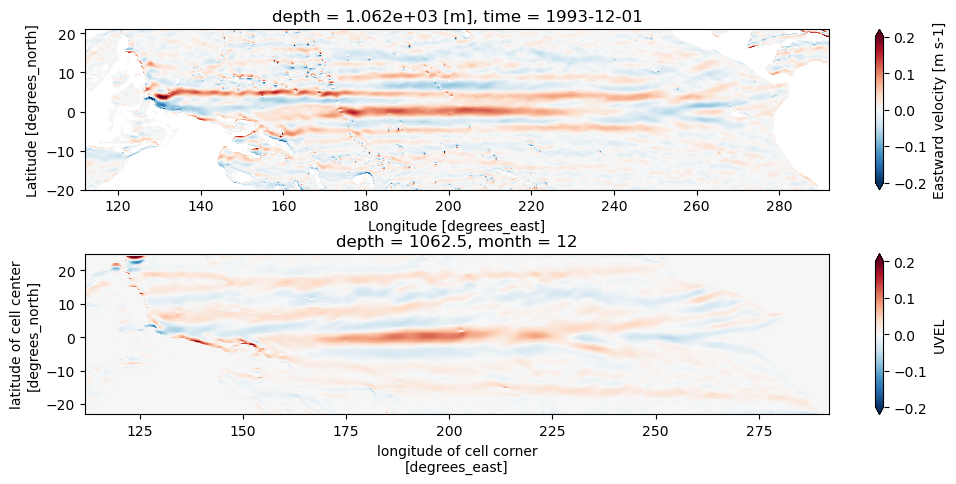

In [7]:

intR=np.array([0, 27.,60.,100.,142.,170.,203.,242.,290.,346.,414.,
               494.,588.,699.,828.,977.,1148.,1343.,1562.,1807.,
               2077.,2373.,2694.,3038.,3404.,3790.,4195.,4616.,5051.,5499.])
dep = (intR[:-1]+intR[1:])/2

vmax = 0.2
mon = 11
yr = 10
a = xr.open_dataset(fclim)
b = xr.open_dataset(path1).isel(T=slice(yr*12,12*(yr+10)))
display(b)
fg = plt.figure(figsize=(12,5))
gs = fg.add_gridspec(2, 1, hspace=0.4)
plt.subplot(gs[0])

a['uo'][mon,35,:,:].plot(vmin=-vmax,vmax=vmax,cmap='RdBu_r',extend='both')
plt.xlim(112,292)
plt.ylim(-20,21)
lev = 15
plt.subplot(gs[1])
bb = b['UVEL'][mon::12,lev,:,:].mean('T')
bb.plot(vmin=-vmax,vmax=vmax,cmap='RdBu_r',extend='both')
plt.title(f'depth = {dep[lev]}, month = {mon+1}')


<xarray.Dataset> Size: 28GB
Dimensions:    (depth: 50, latitude: 601, time: 12, longitude: 2401)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 2kB -25.0 -24.92 -24.83 ... 24.83 24.92 25.0
  * time       (time) datetime64[ns] 96B 1993-01-01 1993-02-01 ... 1993-12-01
  * longitude  (longitude) float32 10kB 95.0 95.08 95.17 ... 294.8 294.9 295.0
Data variables:
    so         (time, depth, latitude, longitude) float64 7GB ...
    thetao     (time, depth, latitude, longitude) float64 7GB ...
    vo         (time, depth, latitude, longitude) float64 7GB ...
    zos        (time, latitude, longitude) float64 139MB ...
    uo         (time, depth, latitude, longitude) float64 7GB ...
    bottomT    (time, latitude, longitude) float64 139MB ...
Attributes:
    credit:                    E.U. Copernicus Marine Service Information (CM...
    references:                http://marine.copernicus.eu
    Conventions:               CF-1.6
    contact:                   servicedesk.cmems@mercator-ocean.eu
    institution:               Mercator Ocean
    title:                     Monthly climatology fields for product GLOBAL_...
    producer:                  CMEMS - Global Monitoring and Forecasting Centre
    source:                    MERCATOR GLORYS12V1
    copernicusmarine_version:  2.2.2

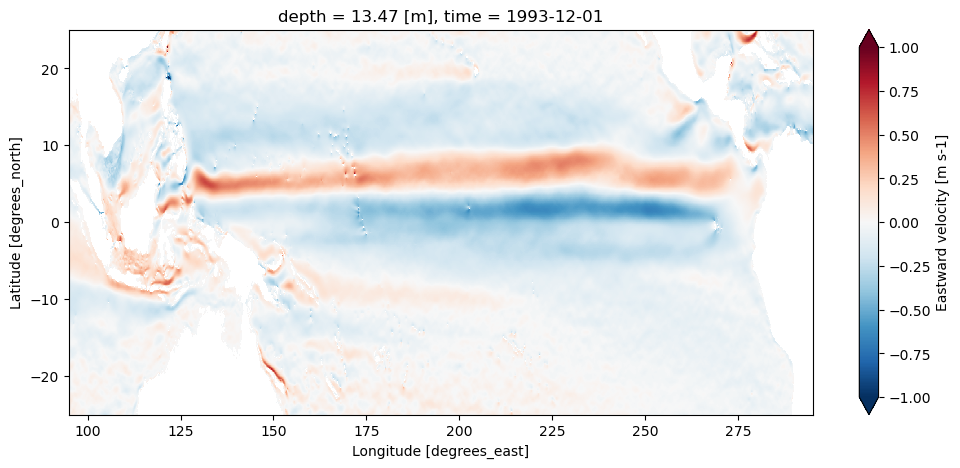

In [18]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
dir = '../../Data/'
path = dir+'cmems_climatology_mon.nc'
a = xr.open_dataset(path)
display(a)
plt.figure(figsize=(12,5))
a['uo'][-1,9,:,:].plot(vmin=-1,vmax=1,cmap='RdBu_r',extend='both')

<xarray.Dataset> Size: 6GB
Dimensions:  (X: 720, Y: 192, Z: 29, T: 360)
Coordinates:
  * X        (X) float64 6kB 112.0 112.2 112.5 112.8 ... 291.0 291.2 291.5 291.8
  * Y        (Y) float64 2kB -23.0 -22.75 -22.5 -22.25 ... 24.0 24.25 24.5 24.75
  * Z        (Z) float64 232B -13.5 -43.5 -80.0 ... -4.834e+03 -5.276e+03
  * T        (T) datetime64[ns] 3kB 1940-02-15 1940-03-16 ... 1969-08-11
Data variables:
    iter     (T) int32 1kB ...
    phiHyd   (T, Z, Y, X) float32 6GB ...
Attributes: (12/18)
    MITgcm_version:  checkpoint69e
    build_user:      zhanghang
    build_host:      login2
    build_date:      2025年 11月 05日 星期三 16:13:35 CST
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    ...              ...
    nSy:             1
    nPx:             16
    nPy:             4
    Nx:              720
    Ny:              192
    Nr:              29

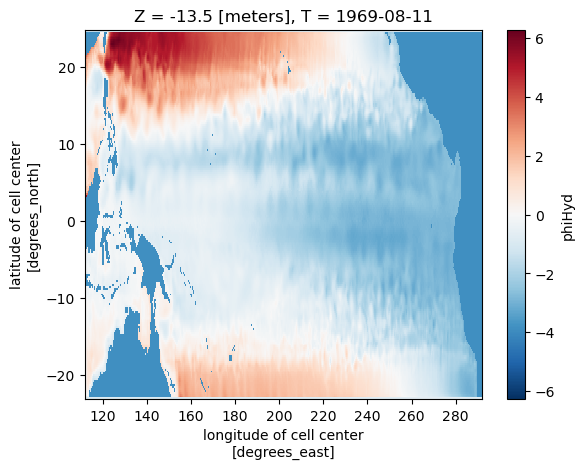

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
fclim = '../output/251112/dync.nc'
a = xr.open_dataset(fclim)
display(a)
a['phiHyd'][-1,0].plot()